In [1]:
import healpy as hp, numpy as np, prjlib
from matplotlib.pyplot import *

In [2]:
Mla, __ = prjlib.window('la',nside=512,ascale=0)
Msa, __ = prjlib.window('sa',nside=512,ascale=0)

The loaded SAT mask is further multiplied by hit-count "binary" (not hit count itself)


/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [3]:
fsky_la = np.average(Mla)
fsky_sa = np.average(Msa)
fsky_ov = np.average(Msa*Mla)
print(fsky_la)
print(fsky_sa)
print(fsky_ov)
print(fsky_la+fsky_sa-fsky_ov)

0.2908276120821635
0.2772531509399414
0.21667968233426413
0.3514010806878408


In [4]:
Mla[Mla==0] = np.nan
Msa[Msa==0] = np.nan

In [5]:
Hla = prjlib.hitmap('la',512)
Hsa = prjlib.hitmap('sa',512)

In [6]:
w1la = np.average(Hla)
w1sa = np.average(Hsa)
w2la = np.average(Hla**2)
w2sa = np.average(Hsa**2)
print(w1la,w1sa,w2la,w2sa)
print(fsky_la*w2la/w1la**2,1/fsky_la)

0.14110664609279636 0.0816702089724941 0.04651987850227313 0.039673498593158225
0.6794840557811961 3.438463056655995


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  from ipykernel import kernelapp as app
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap

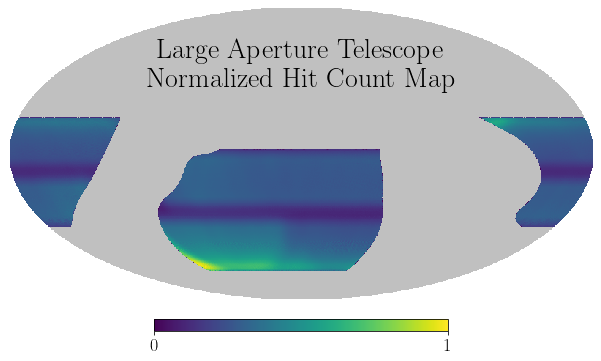

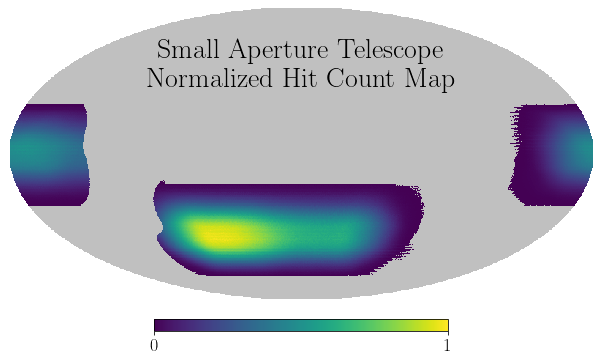

In [40]:
params = {
    'axes.labelsize': 16,
    'axes.titlesize': 28,
    'legend.fontsize': 14,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'text.usetex': True,
    'font.family': "Times New Roman", 
    'axes.titley':1.0,
    'axes.titlepad': -80,
    }
rcParams.update(params)
hp.mollview(Hla*Mla,min=0,max=1,
            title=r'Large Aperture Telescope' "\n" 'Normalized Hit Count Map',badcolor='silver')
savefig('fig_window_LAT.pdf')
hp.mollview(Hsa*Msa,min=0,max=1,
            title=r'Small Aperture Telescope' "\n" 'Normalized Hit Count Map',badcolor='silver')
savefig('fig_window_SAT.pdf')